In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# !pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
# !pip install -q transformers
# !pip install -q datasets
!pip install -q evaluate
# !pip install -q accelerate
# !pip install -q gluonts ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00


Metrics with different hyperparameter values

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('RNN')
for combination in combinations:
    base_model = RnnModel(df, unit_type="base", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=50, batch_size=combination[0])

    mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
    mase_training = mase_training[:, 1]
    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_RNN.csv')

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('LSTM')
for combination in combinations:
    base_model = RnnModel(df, unit_type="lstm", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=50, batch_size=combination[0])

    mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
    mase_training = mase_training[:, 1]
    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_LSTM.csv')

Testing with test partition

[48, 128, 0.005]
Epoch 1/50
30/30 [==============================] - 2s 28ms/step - loss: 0.4511
Epoch 2/50
30/30 [==============================] - 1s 28ms/step - loss: 0.2687
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 0.2580
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2280
Epoch 5/50
30/30 [==============================] - 1s 36ms/step - loss: 0.2207
Epoch 6/50
30/30 [==============================] - 1s 48ms/step - loss: 0.2394
Epoch 7/50
30/30 [==============================] - 1s 40ms/step - loss: 0.3382
Epoch 8/50
30/30 [==============================] - 1s 26ms/step - loss: 0.3035
Epoch 9/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2909
Epoch 10/50
30/30 [==============================] - 1s 28ms/step - loss: 0.2523
Epoch 11/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2612
Epoch 12/50
30/30 [==============================] - 1s 26ms/step - loss: 0.2376
Epoch 13/50
30/30 [=

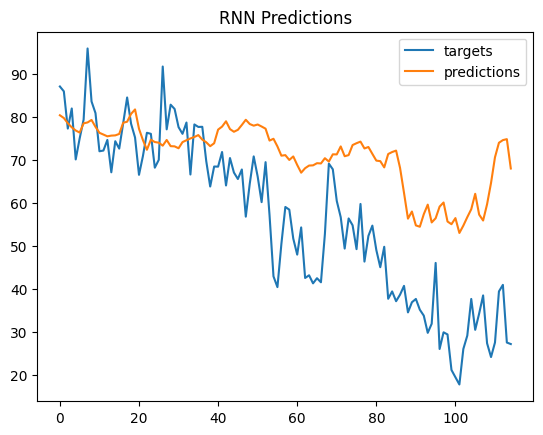

In [6]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_RNN.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="base", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=50, batch_size=opt[0])

mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
mase_training = mase_training[:, 1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()

[48, 64, 0.0005]
Epoch 1/50
30/30 [==============================] - 3s 7ms/step - loss: 0.6471
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.3936
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 0.3513
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: 0.3347
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3209
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3092
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3004
Epoch 8/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2912
Epoch 9/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2853
Epoch 10/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2767
Epoch 11/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2724
Epoch 12/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2614
Epoch 13/50
30/30 [=============

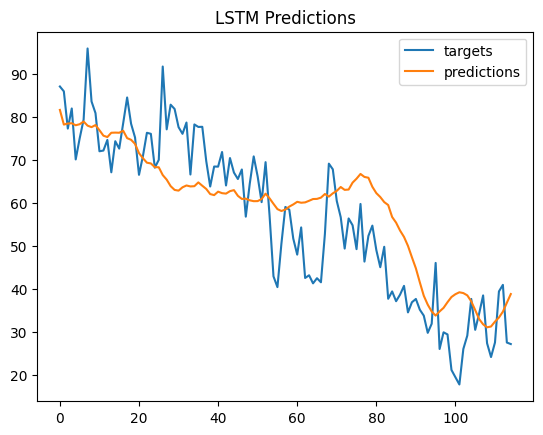

In [7]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_LSTM.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="lstm", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=50, batch_size=opt[0])

mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
mase_training = mase_training[:, 1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()